In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [8]:
import os
import pickle
import datetime
from mix_Network import *

dataset = 'nmnist'
records_path = '../Records'
timestr = datetime.datetime.now().date().isoformat()
timestr = '2021-01-27'

%mkdir -p ../Records
%mkdir -p ../Records/EXP_03_NMNIST

homeo = True
sigma = None
pooling = False
homeinv = False
jitonic = [None,None] #[temporal, spatial]
jitter = False
tau = 5
nb_train = 500
nb_test = 100
krnlinit = 'rdn'
nblay = 3
nbclust = 4
filt = 2

# Spatial Jitter only on the classification

In [9]:
def makehisto(filt, tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test, jitonic):
    if pooling:
        hotshom = poolingnetwork(krnlinit=krnlinit, filt=filt, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    else:
        hotshom = network(krnlinit=krnlinit, filt=filt, tau=tau, nblay=nblay, nbclust=nbclust, homeo=homeo, sigma=sigma, homeinv=homeinv, jitter=jitter)
    arch = [hotshom.L[i].kernel.shape[1] for i in range(len(hotshom.L))]
    fname = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{krnlinit}_{tau}_{homeo}_{sigma}_{homeinv}_{jitter}_{jitonic}'
    fname_model = f'{records_path}/EXP_03_NMNIST/{timestr}_hots_{dataset}_{arch}_{krnlinit}_{tau}_{homeo}_{sigma}_{homeinv}_{jitter}_model.pkl'
    print(fname_model)
    if not os.path.isfile(fname_model):
        loaderhom, order = hotshom.learningall(dataset=dataset)
        with open(fname_model, 'wb') as file:
            pickle.dump([hotshom, loaderhom, order], file, pickle.HIGHEST_PROTOCOL)
    else:
        with open(fname_model, 'rb') as file:
            hotshom, loaderhom, order = pickle.load(file)
    hotshom.plotlayer()
    for homeo in [False,True]:
        for i in range(len(hotshom.L)):
            hotshom.L[i].homeo=homeo
        if not os.path.isfile(fname+f'_histo_{nb_train}_{nb_test}_{homeo}.pkl'):       
            trainmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = nb_train, jitonic=jitonic)
            testmaphom, loaderhom, _ = hotshom.running(loaderhom, order, nb_digit = nb_test, jitonic=jitonic)
            with open(fname+f'_histo_{nb_train}_{nb_test}_{homeo}.pkl', 'wb') as file:
                pickle.dump([trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
        else:
            with open(fname+f'_histo_{nb_train}_{nb_test}_{homeo}.pkl', 'rb') as file:
                trainmaphom, testmaphom = pickle.load(file)
        histoscore(trainmaphom,testmaphom)
    return hotshom, loaderhom, order, trainmaphom, testmaphom

In [ ]:
for i in np.arange(0,10,0.5):
    i = round(i,1)
    jitonic = [None,i]
    makehisto(filt, tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test, jitonic);

../Records/EXP_03_NMNIST/2021-01-27_hots_nmnist_[4, 8, 16]_rdn_5_True_None_False_False_model.pkl


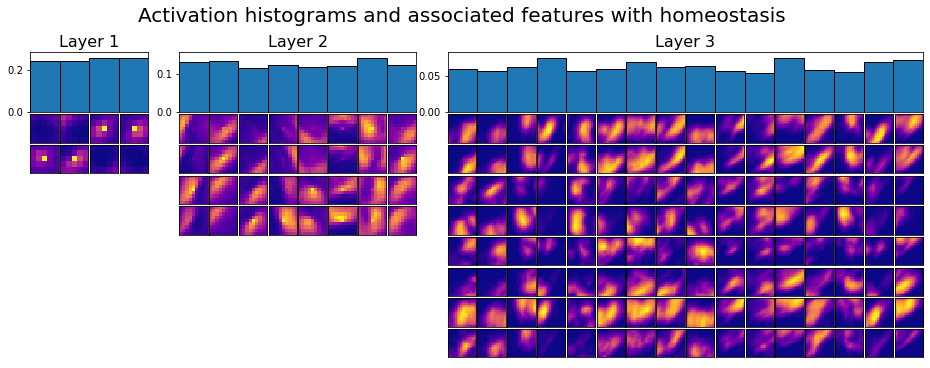

time jitter -> var = 0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/



time jitter -> var = 0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/



-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 79.0% - eucli = 80.0% - norm = 79.0%
Classification scores with kNN: 3-NN = 79.0% - 6-NN = 74.0%
Classification scores with entropy: Kullback-Leibler = 77.0% - Jensen-Shannon = 77.0%
----------------------------------------------------------------------------------------------------
time jitter -> var = 0
Using downloaded and verified file: ../Data/nmnist_test.zip
Extracting ../Data/nmnist_test.zip to ../Data/


In [ ]:
for i in np.arange(0,3000,500):
    i = round(i,1)
    jitonic = [i,None]
    makehisto(filt, tau, krnlinit, nblay, nbclust, homeo, records_path, timestr, dataset, sigma, homeinv, jitter, nb_train, nb_test, jitonic);